<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->
# <font color='blue'>Data Science Academy</font>
## <font color='blue'>Matemática e Estatística Aplicada Para Data Science, Machine Learning e IA</font>
## <font color='blue'>Testes Estatísticos Paramétricos</font>

## Instalando e Carregando os Pacotes

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
%pip install -q -U watermark


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Imports
import scipy
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import shapiro, ttest_ind, levene, bartlett, f_oneway
from statsmodels.formula.api import ols

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" 

Author: Data Science Academy



## O Que São Testes Paramétricos?

Leia o e-book no Capítulo 21.

## Estimação Pontual e Intervalar

Leia o e-book no Capítulo 21.

## Propriedades dos Testes Paramétricos

Os testes paramétricos, incluindo o Teste t de Student, o Teste F (ANOVA de Um Fator) e a ANOVA de dois fatores, partem do pressuposto de que os dados seguem uma distribuição específica, geralmente a distribuição normal. Isso significa que os testes assumem que os dados têm uma distribuição de probabilidade conhecida e definida. Essa é uma suposição fundamental que permite o uso de parâmetros da distribuição, como média e desvio padrão, na análise.

Estes testes fazem inferências sobre parâmetros da população, como a média (μ) ou a variância, a partir de estatísticas amostrais. Eles são projetados para testar hipóteses relacionadas a esses parâmetros, como a igualdade de médias ou variações entre grupos.

Os valores das estatísticas de teste (como o valor t no Teste t de Student e o valor F na ANOVA) são calculados usando parâmetros estimados dos dados, como a média e a variância. Estes valores são então comparados com uma distribuição teórica (distribuição t para o Teste t e distribuição F para a ANOVA) para determinar a significância estatística das observações.

Quando as suposições dos testes paramétricos são atendidas, eles são geralmente mais eficientes (no sentido estatístico de ter maior poder para detectar um efeito real) do que seus equivalentes não paramétricos. Isso se deve ao fato de que utilizam mais informações sobre a distribuição dos dados.

Além da normalidade, a ANOVA, por exemplo, assume que as variâncias dos grupos são iguais (homocedasticidade). Esta é outra suposição paramétrica que facilita a comparação entre grupos.

Devido a essas características, os testes são classificados como paramétricos, e é essencial que os dados analisados atendam às suposições dos testes para garantir a validade dos resultados. Quando as suposições paramétricas não são satisfeitas, os testes não paramétricos, que não fazem suposições específicas sobre a distribuição dos dados, podem ser uma alternativa apropriada.

## Teste t de Student

O Teste t de Student é um teste estatístico usado para determinar se há uma diferença significativa entre as médias de dois grupos, que pode ser aplicado em diversas situações, incluindo quando as variações são desconhecidas e assumindo que as distribuições dos dois grupos são normais. Existem três principais variantes do teste t:

- Teste t de uma amostra: Compara a média da amostra com uma média populacional conhecida.
- Teste t de duas amostras independentes: Compara as médias de duas amostras independentes.
- Teste t pareado: Compara as médias de duas amostras relacionadas ou emparelhadas.

O teste calcula um valor t, que indica a diferença entre as médias das amostras em relação à variação observada nas amostras. Esse valor é então usado para calcular a probabilidade (valor-p) de observar tal diferença se, na realidade, não houver diferença entre as médias da população (hipótese nula).

Vejamos um exemplo de Teste t de duas amostras independentes.

Suponha que queremos testar se existe uma diferença significativa nas alturas médias de plantas tratadas com dois diferentes tipos de fertilizantes.

In [4]:
# Alturas das plantas (em cm) para cada tipo de fertilizante
alturas_fertilizante_A = np.array([20, 21, 22, 24, 26, 28, 23, 25, 27, 29])
alturas_fertilizante_B = np.array([19, 20, 21, 22, 24, 25, 26, 27, 28, 30])

In [5]:
# Realizando o teste t de duas amostras independentes
t_stat, p_valor = ttest_ind(alturas_fertilizante_A, alturas_fertilizante_B)

As hipóteses desse teste são formuladas da seguinte maneira:

- Hipótese Nula (H0): Não há diferença significativa entre as médias das duas populações. 
- Hipótese Alternativa (H1 ou Ha): Existe uma diferença significativa entre as médias das duas populações.

O teste t de duas amostras independentes pressupõe que as amostras são aleatórias, independentes entre si e que as populações de origem têm distribuições normais com variâncias iguais (homocedasticidade). Quando essas suposições não são atendidas, podem ser necessários testes alternativos ou ajustes nos procedimentos.

O valor-p no teste t de duas amostras independentes é usado para determinar se a diferença observada entre as médias das duas amostras é estatisticamente significativa. A interpretação do valor-p depende do nível de significância escolhido para o teste, que é geralmente indicado por α (alfa). O nível de significância é a probabilidade de rejeitar a hipótese nula quando ela é verdadeira (erro do tipo I). Os valores de α mais comuns são 0,05 (5%) ou 0,01 (1%).

Aqui está como você pode interpretar o valor-p:

- Se o valor-p ≤ α: Há evidências estatísticas suficientes para rejeitar a hipótese nula. Isso significa que existe uma diferença significativa entre as médias das duas populações. A natureza dessa diferença (se uma média é maior ou menor que a outra) dependerá da direção da hipótese alternativa.

- Se o valor-p > α: Não há evidências estatísticas suficientes para rejeitar a hipótese nula. Isso significa que não há diferença significativa entre as médias das duas populações, com base nos dados da amostra e no nível de significância escolhido.

In [6]:
print(f"Estatística t: {t_stat:.3f}")
print(f"Valor-p: {p_valor:.3f}")

Estatística t: 0.200
Valor-p: 0.844


A estatística t no teste t de duas amostras independentes é uma medida da diferença entre as médias das duas amostras em relação à variabilidade combinada das duas amostras. 

**Valor de t próximo de zero**: Indica que a diferença entre as médias das duas amostras é pequena em relação à variabilidade das amostras. Isso sugere que não há uma diferença significativa entre as duas populações.

**Valor de t positivo**: Indica que a média da primeira amostra é maior do que a média da segunda amostra. Quanto maior o valor de t, maior é a diferença entre as médias em relação à variabilidade.

**Valor de t negativo**: Indica que a média da primeira amostra é menor do que a média da segunda amostra. Novamente, quanto maior o valor absoluto de t, maior é a diferença entre as médias em relação à variabilidade.

In [7]:
# Interpretando o resultado

nivel_significancia = 0.05

if p_valor <= nivel_significancia:
    print("Há evidências suficientes para rejeitar a hipótese nula. Existe uma diferença significativa entre as médias.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. Não existe uma diferença significativa entre as médias.")

Não há evidências suficientes para rejeitar a hipótese nula. Não existe uma diferença significativa entre as médias.


Enretanto, não checamos uma das suposições do Teste t de Student, que as variáveis seguem uma Distribuição Normal. Podemos fazer essa checagem usando o Teste Shapiro-Wilk. Veja os detalhes no videobook a seguir.

## Teste de Shapiro-Wilk

In [8]:
# Teste de Shapiro-Wilk para verificar a normalidade
stat_A, p_A = shapiro(alturas_fertilizante_A)
stat_B, p_B = shapiro(alturas_fertilizante_B)

O teste Shapiro é aplicado separadamente aos dados de altura das plantas para cada tipo de fertilizante. Se o Valor-p obtido for maior que o nível de significância (tipicamente 0.05), então não temos evidências suficientes para rejeitar a hipótese nula de normalidade, sugerindo que os dados podem ser considerados normalmente distribuídos. Se o p-valor for menor que o nível de significância, há evidências suficientes para rejeitar a hipótese de normalidade, indicando que os dados podem não seguir uma distribuição normal.

Lembrando que a decisão de usar o teste t de Student depende fortemente da suposição de normalidade dos dados. Se essa suposição for violada, outros testes, como testes não paramétricos, podem ser mais adequados.

In [9]:
print(f"Resultado do teste de Shapiro-Wilk para o fertilizante A: Estatística={stat_A:.3f}, Valor-p={p_A:.3f}")
print(f"Resultado do teste de Shapiro-Wilk para o fertilizante B: Estatística={stat_B:.3f}, Valor-p={p_B:.3f}")

Resultado do teste de Shapiro-Wilk para o fertilizante A: Estatística=0.970, Valor-p=0.892
Resultado do teste de Shapiro-Wilk para o fertilizante B: Estatística=0.968, Valor-p=0.872


In [10]:
# Interpretando os resultados

nivel_significancia = 0.05

if p_A > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade para o fertilizante A.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade para o fertilizante A.")

if p_B > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de normalidade para o fertilizante B.")
else:
    print("Há evidências suficientes para rejeitar a hipótese de normalidade para o fertilizante B.")

Não há evidências suficientes para rejeitar a hipótese de normalidade para o fertilizante A.
Não há evidências suficientes para rejeitar a hipótese de normalidade para o fertilizante B.


## Teste F (ANOVA de Um Fator)

O Teste F, também conhecido como análise de variância (ANOVA), é um procedimento estatístico usado para comparar as médias de três ou mais grupos para determinar se pelo menos um dos grupos difere significativamente dos outros em termos de sua média. O Teste F avalia a hipótese nula de que todas as populações das quais as amostras foram retiradas têm a mesma média, contra a hipótese alternativa de que pelo menos uma média de população é diferente.

O valor F é calculado dividindo a variância entre os grupos pela variância dentro dos grupos. Se a variância entre os grupos é significativamente maior do que a variância dentro dos grupos, isso sugere que pelo menos um dos grupos difere dos outros em termos de sua média, levando à rejeição da hipótese nula.

Exemplo: Teste F (ANOVA de um fator).

Suponhamos que você deseja testar se três diferentes dietas têm efeitos distintos sobre o peso de grupos de indivíduos. As três dietas são o Grupo A, Grupo B e Grupo C. Você mediu o peso perdido por um mês em cada grupo e deseja saber se há diferenças significativas entre os efeitos das dietas.

In [10]:
# Peso perdido por indivíduos em cada grupo de dieta (em kg)
peso_perdido_A = np.array([2.1, 1.9, 2.2, 2.4, 2.3, 2.1, 2.2, 2.0])
peso_perdido_B = np.array([1.5, 1.7, 1.6, 1.8, 1.5, 1.7, 1.6])
peso_perdido_C = np.array([3.1, 3.2, 3.0, 3.3, 3.1, 3.2, 3.1, 3.0])

In [11]:
# Realizando ANOVA de um fator
f_stat, p_valor = f_oneway(peso_perdido_A, peso_perdido_B, peso_perdido_C)

In [12]:
print(f"Estatística F: {f_stat:.3f}")
print(f"Valor-P: {p_valor:.3f}")

Estatística F: 266.012
Valor-P: 0.000


In [13]:
# Interpretando o resultado

nivel_significancia = 0.05

if p_valor <= nivel_significancia:
    print("Há evidências suficientes para rejeitar a hipótese nula. Pelo menos uma das dietas tem um efeito significativamente diferente sobre o peso perdido.")
else:
    print("Não há evidências suficientes para rejeitar a hipótese nula. Não há diferenças significativas entre os efeitos das dietas no peso perdido.")

Há evidências suficientes para rejeitar a hipótese nula. Pelo menos uma das dietas tem um efeito significativamente diferente sobre o peso perdido.


Para verificar as suposições para o teste F (ANOVA), você precisa considerar principalmente duas suposições: normalidade dos resíduos e homogeneidade das variâncias entre os grupos.

1. Normalidade dos Resíduos

A normalidade dos resíduos pode ser verificada usando o teste de Shapiro-Wilk, similarmente ao que foi feito anteriormente. Contudo, para a ANOVA, o teste é aplicado aos resíduos do modelo, que são as diferenças entre os valores observados e os valores previstos (ajustados) pelo modelo. Normalmente, isso exigiria a construção de um modelo ANOVA usando, por exemplo, statsmodels para acessar os resíduos diretamente. Por simplicidade e como não construímos o modelo aqui, podemos verificar a normalidade dos grupos individualmente como uma aproximação inicial.

2. Homogeneidade das Variâncias

A homogeneidade das variâncias (também conhecida como homocedasticidade) entre os grupos pode ser verificada pelo teste de Levene ou pelo teste de Bartlett. O teste de Levene é mais robusto para distribuições que não seguem a normalidade, enquanto o teste de Bartlett é mais sensível a desvios da normalidade.

In [14]:
# Verificando a suposição de Normalidade dos Resíduos

# Calculando as médias dos grupos
media_A = np.mean(peso_perdido_A)
media_B = np.mean(peso_perdido_B)
media_C = np.mean(peso_perdido_C)

# Calculando os resíduos
residuos_A = peso_perdido_A - media_A
residuos_B = peso_perdido_B - media_B
residuos_C = peso_perdido_C - media_C

# Concatenando os resíduos
residuos = np.concatenate([residuos_A, residuos_B, residuos_C])

# Testando a normalidade dos resíduos
_, p_valor_shapiro = shapiro(residuos)
print(f"Valor-p do teste de Shapiro-Wilk para os resíduos: {p_valor_shapiro:.3f}")

# Interpretando o resultado do teste de Shapiro-Wilk
if p_valor_shapiro > 0.05:
    print("Os resíduos seguem uma distribuição normal.")
else:
    print("Os resíduos não seguem uma distribuição normal.")

Valor-p do teste de Shapiro-Wilk para os resíduos: 0.713
Os resíduos seguem uma distribuição normal.


In [16]:
# Verificando a suposição de Homogeneidade das Variâncias

# Teste de Levene para homogeneidade das variâncias
_, p_levene = levene(peso_perdido_A, peso_perdido_B, peso_perdido_C)

# Teste de Bartlett para homogeneidade das variâncias
_, p_bartlett = bartlett(peso_perdido_A, peso_perdido_B, peso_perdido_C)

print(f"Valor-P de Levene: {p_levene:.3f}")
print(f"Valor-P de Bartlett: {p_bartlett:.3f}")

# Interpretando os resultados

nivel_significancia = 0.05

if p_levene > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Levene).")
else:
    print("Há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Levene).")

if p_bartlett > nivel_significancia:
    print("Não há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Bartlett).")
else:
    print("Há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Bartlett).")

Valor-P de Levene: 0.412
Valor-P de Bartlett: 0.473
Não há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Levene).
Não há evidências suficientes para rejeitar a hipótese de homogeneidade das variâncias (Bartlett).


Neste exemplo, primeiro aplicamos o teste de Shapiro-Wilk para verificar a normalidade dos resíduos. Depois, usamos o teste de Levene e o teste de Bartlett para verificar a homogeneidade das variâncias entre os grupos. Se os valores-p são maiores que o nível de significância (0.05), não rejeitamos as hipóteses nulas, o que significa que as suposições de normalidade e homogeneidade das variâncias são atendidas. 
<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

## Análise de Variância (ANOVA) 

A Análise de Variância (ANOVA) de dois fatores é um teste estatístico utilizado para examinar a influência de dois fatores (variáveis independentes) diferentes sobre uma variável dependente. Ao contrário da ANOVA de um fator, que avalia o efeito de um único fator, a ANOVA de dois fatores permite aos pesquisadores estudar simultaneamente os efeitos principais de cada um dos dois fatores, bem como a possível interação entre eles sobre a variável dependente. A interação ocorre quando o efeito de um fator sobre a variável dependente varia de acordo com os níveis do outro fator.

Efeitos Principais: Refere-se ao impacto direto de cada fator na variável dependente, ignorando a presença do outro fator.

Efeito de Interação: Ocorre quando o efeito de um fator sobre a variável dependente muda em diferentes níveis do outro fator.

Exemplo: ANOVA de Dois Fatores

Imagine que você está estudando o efeito de dois fatores diferentes - Tipo de Dieta (A, B) e Intensidade de Exercícios (baixo, médio, alto) - no peso perdido por indivíduos. Você quer saber não apenas o efeito de cada fator individualmente mas também se há alguma interação entre Tipo de Dieta e Intensidade de Exercícios sobre a quantidade de peso perdido.

In [15]:
# Criando dados de exemplo
dados = pd.DataFrame({
    'PesoPerdido': [1.2, 1.5, 1.7, 2.0, 2.3, 2.5, 2.8, 3.0, 2.4, 2.6, 2.9, 3.1,
                    1.8, 2.0, 2.2, 2.5, 2.7, 2.9, 3.2, 3.5, 3.1, 3.3, 3.6, 3.8],
    'Dieta': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
    'Exercicio': ['Baixo', 'Baixo', 'Baixo', 'Baixo', 'Medio', 'Medio', 'Medio', 'Medio', 'Alto', 'Alto', 'Alto', 'Alto', 'Baixo', 'Baixo', 'Baixo', 'Baixo', 'Medio', 'Medio', 'Medio', 'Medio', 'Alto', 'Alto', 'Alto', 'Alto']
})

In [16]:
dados.head()

,PesoPerdido,Dieta,Exercicio
0,1.2,A,Baixo
1,1.5,A,Baixo
2,1.7,A,Baixo
3,2.0,A,Baixo
4,2.3,A,Medio


In [17]:
# Ajustando o modelo
modelo = ols('PesoPerdido ~ C(Dieta) + C(Exercicio) + C(Dieta):C(Exercicio)', data = dados).fit()

In [18]:
# Realizando a ANOVA
resultado_anova = sm.stats.anova_lm(modelo, typ = 2)

In [19]:
print(resultado_anova)

                          sum_sq    df          F        PR(>F)
C(Dieta)               13.387531   1.0  90.040034  1.216885e-08
C(Exercicio)            5.747203   2.0  19.326878  2.632067e-05
C(Dieta):C(Exercicio)   2.747241   2.0   9.238511  1.575401e-03
Residual                2.825000  19.0        NaN           NaN


A tabela ANOVA resume os resultados de uma análise de variância para o modelo que examina os efeitos do tipo de dieta, intensidade de exercícios e sua interação sobre o peso perdido. Aqui está a interpretação de cada componente da tabela:

**sum_sq**: Soma dos quadrados representa a variabilidade total atribuída a cada fonte de variação.

**df**: Graus de liberdade associados a cada fonte de variação.

**F**: Estatística F, que é a razão entre a variância média devido a uma fonte de variação e a variância média residual (dentro dos grupos).

**PR(>F)**: Valor-p associado ao teste F, que indica a probabilidade de observar uma estatística F tão extrema quanto, ou mais do que, a estatística calculada, assumindo que a hipótese nula é verdadeira.

Interpretação dos Resultados

**C(Dieta)**:

Soma dos quadrados: 13.387531, indica a variabilidade no peso perdido atribuída ao tipo de dieta.

Graus de liberdade: 1, refletindo as categorias de dieta menos um.

Estatística F: 90.040034, sugerindo que o tipo de dieta tem um efeito significativo no peso perdido.

Valor-p: Muito abaixo do nível de significância comum de 0.05, indicando que é extremamente improvável observar essa estatística F sob a hipótese nula de que a dieta não afeta o peso perdido. Isso leva à rejeição da hipótese nula, confirmando que o tipo de dieta tem um efeito significativo.

**C(Exercicio)**:

Soma dos quadrados: 5.747203, indicando a variabilidade no peso perdido atribuída ao regime de exercícios.

Graus de liberdade: 2, correspondendo aos níveis de exercício menos um.

Estatística F: 19.326878, sugerindo que o regime de exercícios tem um efeito significativo no peso perdido.

Valor-p: Também muito abaixo do nível de significância de 0.05, indicando que a influência da intensidade de exercícios no peso perdido é estatisticamente significativa.

**C(Dieta):C(Exercicio) (interação)**:

Soma dos quadrados: 2.747241, refletindo a variabilidade no peso perdido devido à interação entre dieta e exercício.

Graus de liberdade: 2, associados aos níveis de interação entre dieta e exercício.

Estatística F: 9.238511, indicando que a interação entre dieta e exercício afeta significativamente o peso perdido.

Valor-p: Abaixo de 0.05, sugerindo que a maneira como a dieta afeta o peso perdido varia de acordo com a intensidade de exercícios. Isso indica uma interação significativa entre os dois fatores.

**Residual**:

Soma dos quadrados: 2.825000, representando a variabilidade no peso perdido que não é explicada pelos modelos de dieta e exercício.

Graus de liberdade: 19, relacionados ao número de observações menos o número de grupos estimados.

**Conclusão**

Os resultados indicam que tanto o tipo de dieta quanto a intensidade de exercícios têm efeitos significativos no peso perdido, com a dieta tendo o maior efeito. Além disso, existe uma interação significativa entre dieta e exercício, o que significa que o efeito de uma dieta sobre o peso perdido varia dependendo do nível de exercício. Isso destaca a importância de considerar ambos os fatores ao avaliar o impacto na perda de peso.

Vamos agora validar as suposições do teste.

## Validando as Suposições da ANOVA de 2 Fatores

As suposições para a realização desse teste são:

**Independência das observações**: Os dados devem ser independentes, ou seja, a medida de uma observação não deve influenciar a medida de outra observação. Isso geralmente é garantido pelo desenho experimental.

**Normalidade**: As distribuições dos resíduos (erros) para cada combinação de níveis dos fatores devem ser aproximadamente normais. Isso pode ser verificado usando gráficos de probabilidade normal ou testes de normalidade, como o teste de Shapiro-Wilk.

**Homogeneidade de variâncias**: As variâncias dos resíduos para cada combinação de níveis dos fatores devem ser iguais. Isso pode ser verificado usando o teste de Levene ou o teste de Bartlett.

É importante verificar essas suposições ao realizar o teste ANOVA de 2 fatores para garantir a validade dos resultados. Caso alguma das suposições não seja atendida, pode ser necessário transformar os dados ou utilizar métodos alternativos de análise.

In [20]:
# Resíduos do modelo
residuos = modelo.resid

In [21]:
# Verificando a normalidade dos resíduos
_, p_valor_shapiro = shapiro(residuos)
print(f'Valor-P do teste de Shapiro-Wilk: {p_valor_shapiro}')

Valor-P do teste de Shapiro-Wilk: 0.984581470489502


O teste de Shapiro-Wilk foi utilizado para verificar a normalidade dos resíduos. O resultado do valor-p é bastante alto, significando que não há evidências suficientes para rejeitar a hipótese nula de normalidade. Em outras palavras, com base nesse teste, você pode assumir que os resíduos seguem uma distribuição normal, o que é uma das suposições importantes para a validade do teste ANOVA.

Em geral, um valor-p maior que 0.05 no teste de Shapiro-Wilk indica que os resíduos podem ser considerados normalmente distribuídos, enquanto um valor-p menor que 0.05 sugere que os resíduos podem não ser normalmente distribuídos, violando assim essa suposição da ANOVA. Em nosso caso, a suposição de normalidade foi atendida.

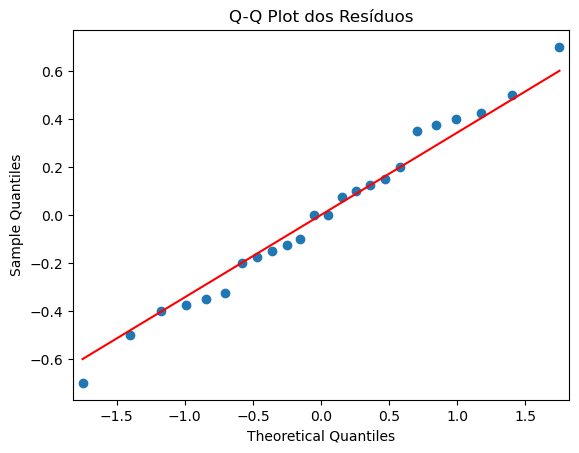

In [22]:
# Gráfico de probabilidade normal (Q-Q plot) dos resíduos
import matplotlib.pyplot as plt
sm.qqplot(residuos, line = 's')
plt.title('Q-Q Plot dos Resíduos')
plt.show()

In [23]:
# Verificando a homogeneidade das variâncias
_, p_valor_levene = levene(dados['PesoPerdido'][dados['Dieta'] == 'A'], 
                           dados['PesoPerdido'][dados['Dieta'] == 'B'])
print(f'Valor-p do teste de Levene: {p_valor_levene}')

Valor-p do teste de Levene: 0.6563431792477592


O teste de Levene foi utilizado para verificar a homogeneidade das variâncias, ou seja, se as variâncias dos resíduos são iguais entre os grupos. Em nosso caso o valor-p do teste de Levene é é maior que o nível de significância de 0.05

Um valor-p maior que 0.05 geralmente indica que não há evidências suficientes para rejeitar a hipótese nula de igualdade das variâncias. Portanto, com base nesse teste, você pode assumir que as variâncias dos resíduos são homogêneas entre os grupos, o que é outra suposição atendida para a validade do teste ANOVA.

As conclusões da ANOVA podem ser usadas com segurança.

Nota:

A definição de H0 e H1 em um teste estatístico segue um princípio fundamental da metodologia científica e estatística. A hipótese nula geralmente representa a ideia de "não há efeito" ou "não há diferença", enquanto a hipótese alternativa sugere que "há um efeito" ou "há uma diferença". Esta escolha não é arbitrária, mas sim orientada pelo objetivo de prover uma afirmação clara que possa ser testada objetivamente.

In [26]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [27]:
#%watermark -v -m

In [28]:
#%watermark --iversions

# Fim